<h1 style="text-align: center; font-weight: bold; font-size: 36px;">Character Level Bigram Model</h1>

# Introduction

This is a simplest possible "lanugage model". As a starter we are going to use **bigrams** to model person names. This is an introduction beforewe move to Neural Networks later on.

Inspired by Karpathy [Neural Networks: Zero-to-Hero](https://github.com/karpathy/nn-zero-to-hero). 
We are using the same [names.txt](https://github.com/karpathy/makemore/blob/master/names.txt) as in Zero to Hero so we can comppare results.

# Imports

In [1]:
import numpy as np
np.set_printoptions(linewidth=200)

# Explore the Data

Load the data and show some examples

In [2]:
with open('../data/names.txt', 'r') as f:
    names = f.read().splitlines()
print("Num names:", len(names))
print("Example names:", names[:10])
print("Min length:", min(len(name) for name in names))
print("Max length:", max(len(name) for name in names))

Num names: 32033
Example names: ['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia', 'harper', 'evelyn']
Min length: 2
Max length: 15


Count the bigram pairs, including special start/stop tokens

In [3]:
# Confirm the vocabulary is ASCII only
letters = sorted(list(set(''.join(names))))

# Add start/stop tokens - same token for both
letters = ['.'] + letters
print(letters)

['.', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']


In [4]:
# Indices for all characters, including start/stop tokens
stoi = {ch: i for i, ch in enumerate(letters)}
itos = {i: ch for i, ch in enumerate(letters)}
# Print first 10 entries to verify
print(list(stoi.items())[:10])
print(list(itos.items())[:10])

[('.', 0), ('a', 1), ('b', 2), ('c', 3), ('d', 4), ('e', 5), ('f', 6), ('g', 7), ('h', 8), ('i', 9)]
[(0, '.'), (1, 'a'), (2, 'b'), (3, 'c'), (4, 'd'), (5, 'e'), (6, 'f'), (7, 'g'), (8, 'h'), (9, 'i')]


In [5]:
# Initialize to zeros
bigram_counts = np.zeros((len(letters), len(letters)), dtype=int)
bigram_counts[:5, :5]

array([[0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0]])

In [6]:
# Count the bigram pairs, including special start/stop tokens
for name in names:
    name = '.' + name + '.'  # add start/stop tokens
    for i in range(len(name) - 1):
        first_char = name[i]
        second_char = name[i + 1]
        bigram_counts[stoi[first_char], stoi[second_char]] += 1

In [7]:
# Print some example bigram counts
bigram_counts[:5, :5]

array([[   0, 4410, 1306, 1542, 1690],
       [6640,  556,  541,  470, 1042],
       [ 114,  321,   38,    1,   65],
       [  97,  815,    0,   42,    1],
       [ 516, 1303,    1,    3,  149]])

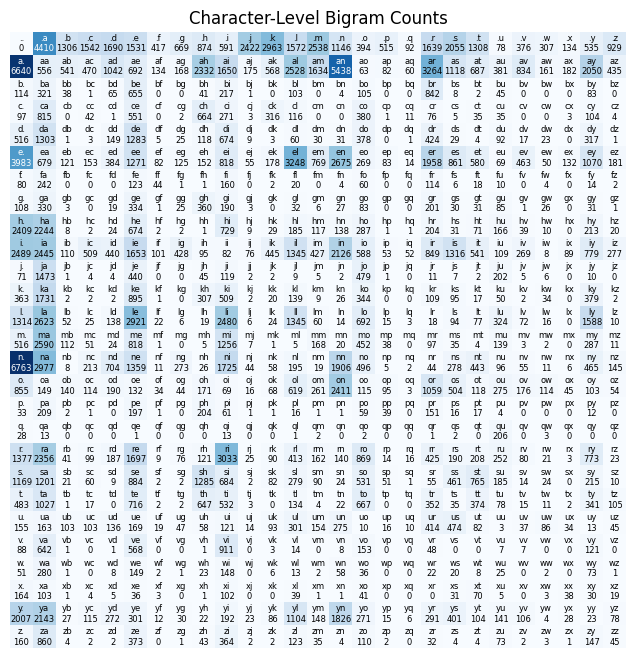

In [8]:
# Plot the bigram_counts as a heatmap with annotated cells showing "current->next\ncount"
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 8))
im = ax.imshow(bigram_counts, cmap='Blues')

max_count = bigram_counts.max()
for i in range(bigram_counts.shape[0]):
    for j in range(bigram_counts.shape[1]):
        text_color = 'white' if bigram_counts[i, j] > (max_count * 0.5) else 'black'
        ax.text(j, i, f"{letters[i]}{letters[j]}\n{bigram_counts[i, j]}",
                ha='center', va='center', color=text_color, fontsize=6)

ax.set_title('Character-Level Bigram Counts')
plt.axis('off')
plt.show()

Implement model smoothing

In [9]:
bigram_counts += 1  # Implement model smoothing

Convert counts to probabilities, rows should sum to 1

In [10]:
# array([[32061],
#       [33913],
#       ...
#       [   28]])
row_sums = bigram_counts.sum(axis=-1, keepdims=True)

# 28 x 28
bigram_probs = bigram_counts / row_sums

# Sanity check rows add to 1
row_prob_sums = bigram_probs.sum(axis=-1, keepdims=True)
assert np.allclose(row_prob_sums, 1.0)

Define helper functions for sampling

In [11]:
def sample_next_char(current_char, BP):
    """Sample the next character given the current character."""
    current_int = stoi[current_char]
    row_probs = BP[current_int]
    next_int = np.random.choice(len(row_probs), p=row_probs)
    return itos[next_int]

def sample_name(BP):
    """Sample a name using the bigram model."""
    chars = ["."]  # start token
    while True:
        next_char = sample_next_char(chars[-1], BP)
        chars.append(next_char)
        if next_char == ".":   # end token
            break
    return "".join(chars)

Generate some names

In [12]:
# Init numpy random seed
np.random.seed(22)

for i in range(10):
    name = sample_name(BP=bigram_probs)
    print(name)

.chasah.
.mar.
.kora.
.ryn.
.quliemi.
.tzir.
.brlgalicaka.
.moa.
.jarigwka.
.kavah.


Sanity check against reference implementation in [makemore_part1_bigrams.ipynb](https://github.com/karpathy/nn-zero-to-hero/blob/master/lectures/makemore/makemore_part1_bigrams.ipynb)

Note: for some reason `torch.multimodal` generates different result in both reference and this notebook, but results are identical, so we are good.

In [13]:
import torch
g = torch.Generator().manual_seed(2147483647)
P = torch.Tensor(bigram_probs)

for i in range(5):
  
  out = []
  ix = 0
  while True:
    p = P[ix]
    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    out.append(itos[ix])
    if ix == 0:
      break
  print(''.join(out))

cexze.
momasurailezitynn.
konimittain.
llayn.
ka.
